In [1]:
import numpy as np
import matplotlib.pyplot as plt 

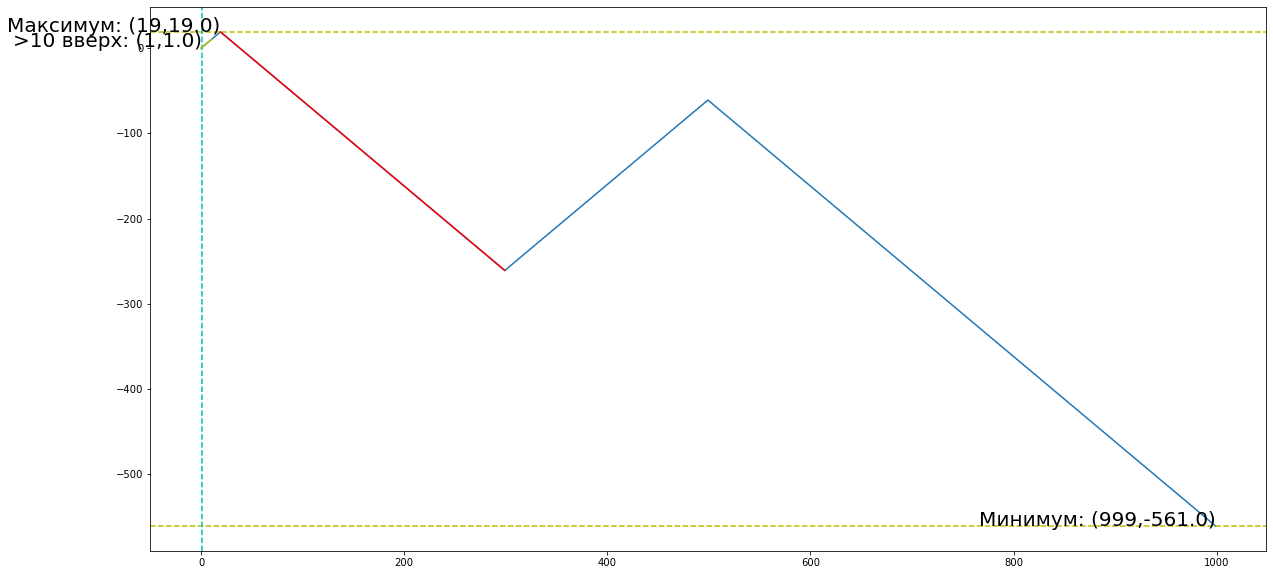

Максимальное значение:  19.0 
Минимальное значение:  -561.0 
Первый момент времени, когда на прогулке сделано, более 10 шагов одну сторону: 1 
Максимальное количество шагов в одну сторону:  280


In [9]:
np.random.seed(42)


### очень криво, нужно np.random.choice

nw = np.insert(np.array(list(map(lambda x: 1 if (x>0.5) else -1, np.random.uniform(0,1,1000)))), 0,0)
rw = np.cumsum(nw)


### мой тест

my_list = np.zeros(1000)
my_list[1:20] = 1
my_list[20:50] = -1
my_list[50:100] = -1
my_list[100:300] = -1
my_list[300:500] = 1
my_list[500:1000] = -1

my_list_cum = np.cumsum(my_list)
nw = my_list
rw = my_list_cum


counts = np.array([])
a = 1
for i in range(len(nw)-1):
    if nw[i] == nw[i+1]:
        a += 1 
    else:
        counts = np.append(counts, a)
        a = 1

try:
    aboveten, = np.where(counts == np.min(counts[counts>10]))        
except:
    aboveten = np.nan

try:
    firstabove = np.int(sum(counts[:aboveten[0]]))
except:
    firstabove = -1

plt.figure(figsize=(20,10))    
plt.plot(rw)
plt.axhline(np.min(rw), color='y', linestyle='--')
plt.text(np.where(rw == np.min(rw))[0][0],np.min(rw),'Минимум: ('+str(np.where(rw == np.min(rw))[0][0])+','+str(np.min(rw))+')', fontsize=20,horizontalalignment='right')

plt.axhline(np.max(rw), color='y', linestyle='--')
plt.text(np.where(rw == np.max(rw))[0][0],np.max(rw),'Максимум: ('+str(np.where(rw == np.max(rw))[0][0])+','+str(np.max(rw))+')', fontsize=20,horizontalalignment='right')

for k in np.where(counts == np.max(counts))[0]:
    above = np.int(sum(counts[:k+1]))
    plt.plot(np.arange(above-int(np.max(counts))-1, above),rw[above-int(np.max(counts))-1:above], color='r')
    np.max(counts)

if firstabove>0:
    plt.axvline(firstabove, color='c', linestyle='--')
    plt.text(firstabove,rw[firstabove],'>10 вверх: ('+str(firstabove)+','+str(rw[firstabove])+')', fontsize=20,horizontalalignment='right')
    plt.plot(np.arange(firstabove-1, firstabove+10),rw[firstabove-1:firstabove+10], color='y')
else: 
    firstabove = 'не случилось, не срослось'

plt.show()

print('Максимальное значение: ', np.max(rw), 
      "\nМинимальное значение: ", np.min(rw),
      "\nПервый момент времени, когда на прогулке сделано, более 10 шагов одну сторону:", firstabove, 
      "\nМаксимальное количество шагов в одну сторону: ", np.int(np.max(counts)))